## Log-odds Ratio over a sliding window

* Given a sequence of length *n*, consider the log-odds ratio of a sliding window of length *w << n*
$$
x_1,x_2,\underline{x_3,x_4,x_5,x_6,x_7},x_8,x_9, \dots x_n
$$

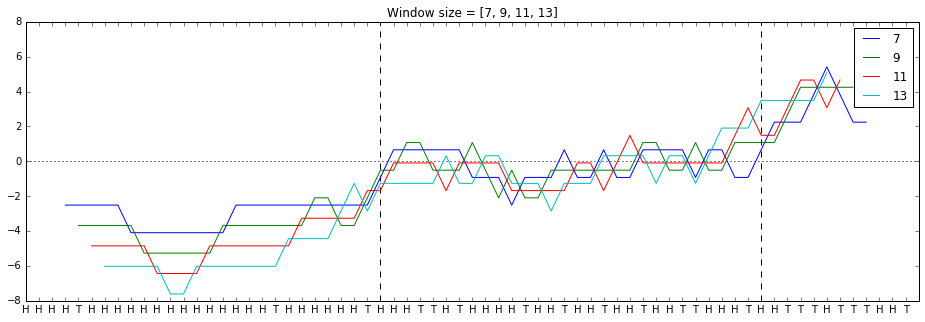

In [7]:
import numpy
import matplotlib.pyplot as plot
%matplotlib inline

rolls = "HHHHTHHHHHHHHHHHHHHTHHHHHHTHHHTTHTHHHHTHHTHHTHHTHHTTHHHTHHTTTHTTTHHT"

windows = [7, 9, 11, 13]
slope = numpy.log2(3)
yplots = [[w - slope*rolls[i:i+w].count('H') for i in range(len(rolls)-w+1)] for w in windows]

fig, ax = plot.subplots(figsize=(16,5))
plot.title("Window size = %s" % windows)
plot.hlines(0, 0, len(rolls), linestyles='dotted')
for i, y in enumerate(yplots): 
    x = range(windows[i]//2, windows[i]//2+len(y))
    plot.plot(x,y, label=str(windows[i]))
plot.legend()
ax.set_xticks([i for i in range(len(rolls))])
plot.vlines([27,56], -8, 8, linestyles='dashed')
result = ax.set_xticklabels([c for c in rolls])

## What does the distribution of spaces between coin swaps look like?

CPU times: user 1.45 s, sys: 15.6 ms, total: 1.47 s
Wall time: 1.49 s


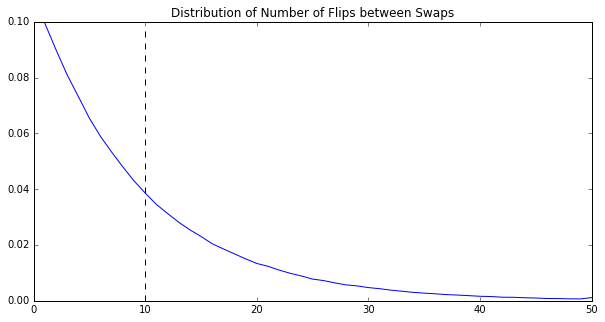

In [25]:
import random
import numpy
random.seed(2022)

def transitionDist(p, trials=1000000):
    windows = []
    last = 0
    while (len(windows) < trials):
        last += 1
        if (random.random() < p):
            windows.append(last)
            last = 0
    return windows

%time dist = transitionDist(0.1)

y, x = numpy.histogram(dist, bins=50, range=(1,51))

ave = numpy.average(dist)
fig = plot.figure(figsize=(10,5))
plot.title("Distribution of Number of Flips between Swaps")
plot.vlines([ave], 0, 0.099, linestyles='dashed')
plot.plot(x[:-1], y/float(len(dist)))
plot.show()